In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import pickle

# Read data

In [2]:
from scipy.io.arff import loadarff

data, meta = loadarff("data/EEG Eye State.arff")
    
data

array([(4329.23, 4009.23, 4289.23, 4148.21, 4350.26, 4586.15, 4096.92, 4641.03, 4222.05, 4238.46, 4211.28, 4280.51, 4635.9 , 4393.85, b'0'),
       (4324.62, 4004.62, 4293.85, 4148.72, 4342.05, 4586.67, 4097.44, 4638.97, 4210.77, 4226.67, 4207.69, 4279.49, 4632.82, 4384.1 , b'0'),
       (4327.69, 4006.67, 4295.38, 4156.41, 4336.92, 4583.59, 4096.92, 4630.26, 4207.69, 4222.05, 4206.67, 4282.05, 4628.72, 4389.23, b'0'),
       ...,
       (4277.44, 3990.77, 4246.67, 4113.85, 4333.33, 4615.38, 4072.82, 4623.59, 4193.33, 4212.82, 4160.51, 4257.95, 4591.79, 4339.49, b'1'),
       (4284.62, 3991.79, 4251.28, 4122.05, 4334.36, 4616.41, 4080.51, 4628.72, 4200.  , 4220.  , 4165.64, 4267.18, 4596.41, 4350.77, b'1'),
       (4287.69, 3997.44, 4260.  , 4121.03, 4333.33, 4616.41, 4088.72, 4638.46, 4212.31, 4226.67, 4167.69, 4274.36, 4597.95, 4350.77, b'1')],
      dtype=[('AF3', '<f8'), ('F7', '<f8'), ('F3', '<f8'), ('FC5', '<f8'), ('T7', '<f8'), ('P7', '<f8'), ('O1', '<f8'), ('O2', '<f8'), ('P8',

In [3]:
meta

Dataset: EEG_DATA
	AF3's type is numeric
	F7's type is numeric
	F3's type is numeric
	FC5's type is numeric
	T7's type is numeric
	P7's type is numeric
	O1's type is numeric
	O2's type is numeric
	P8's type is numeric
	T8's type is numeric
	FC6's type is numeric
	F4's type is numeric
	F8's type is numeric
	AF4's type is numeric
	eyeDetection's type is nominal, range is ('0', '1')

In [4]:
rows = [list(i) for i in data]
data = np.array(rows)

In [5]:
X = data[:, :-1].astype(np.float32)
y = data[:, -1].astype(np.int)

#y = np.array([int(i) for i in y])

In [6]:
X[:10]

array([[4329.23, 4009.23, 4289.23, 4148.21, 4350.26, 4586.15, 4096.92,
        4641.03, 4222.05, 4238.46, 4211.28, 4280.51, 4635.9 , 4393.85],
       [4324.62, 4004.62, 4293.85, 4148.72, 4342.05, 4586.67, 4097.44,
        4638.97, 4210.77, 4226.67, 4207.69, 4279.49, 4632.82, 4384.1 ],
       [4327.69, 4006.67, 4295.38, 4156.41, 4336.92, 4583.59, 4096.92,
        4630.26, 4207.69, 4222.05, 4206.67, 4282.05, 4628.72, 4389.23],
       [4328.72, 4011.79, 4296.41, 4155.9 , 4343.59, 4582.56, 4097.44,
        4630.77, 4217.44, 4235.38, 4210.77, 4287.69, 4632.31, 4396.41],
       [4326.15, 4011.79, 4292.31, 4151.28, 4347.69, 4586.67, 4095.9 ,
        4627.69, 4210.77, 4244.1 , 4212.82, 4288.21, 4632.82, 4398.46],
       [4321.03, 4004.62, 4284.1 , 4153.33, 4345.64, 4587.18, 4093.33,
        4616.92, 4202.56, 4232.82, 4209.74, 4281.03, 4628.21, 4389.74],
       [4319.49, 4001.03, 4280.51, 4151.79, 4343.59, 4584.62, 4089.74,
        4615.9 , 4212.31, 4226.67, 4201.03, 4269.74, 4625.13, 4378.46],

# Analysis

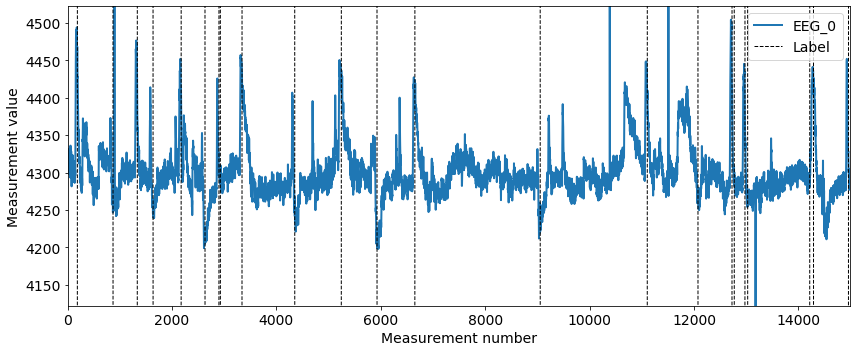

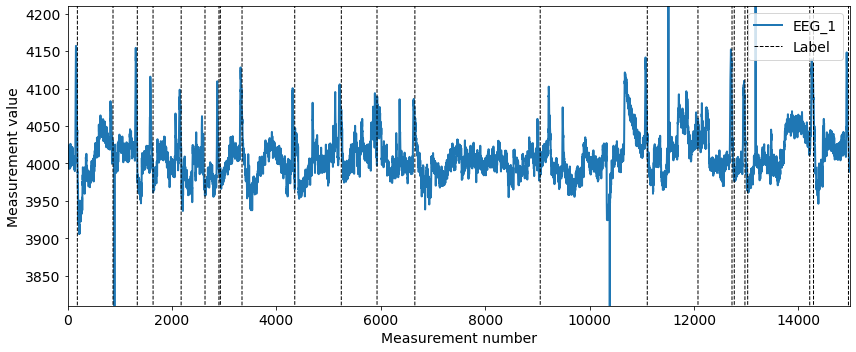

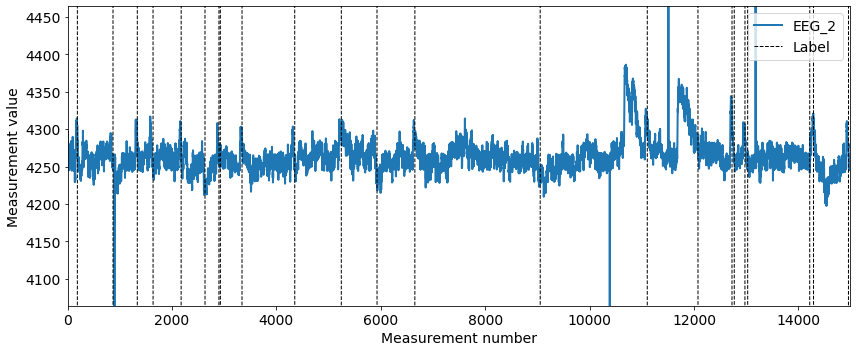

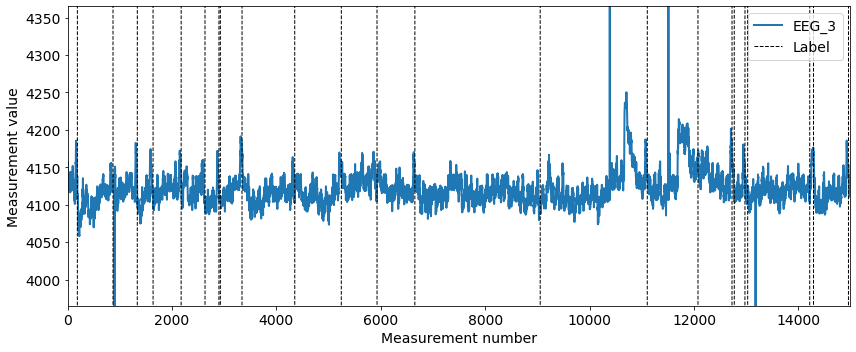

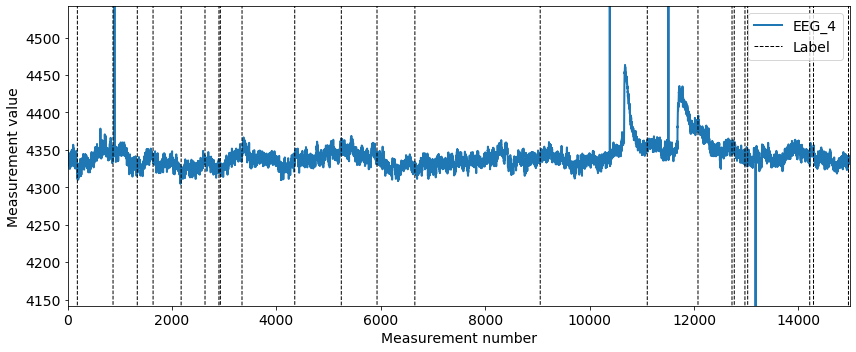

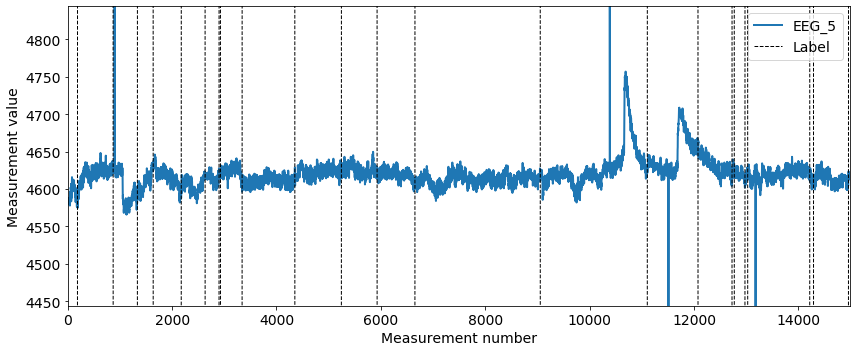

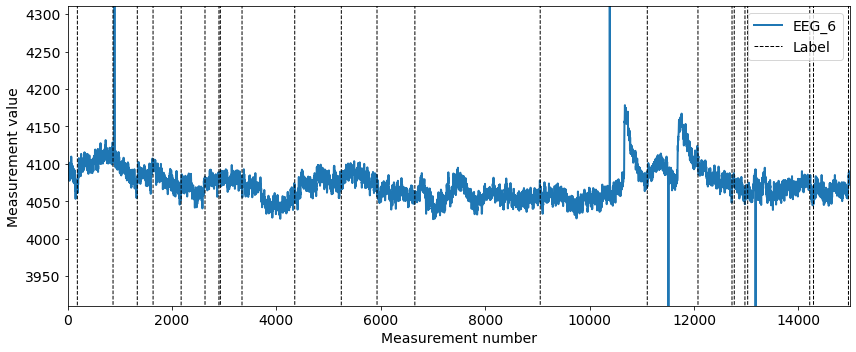

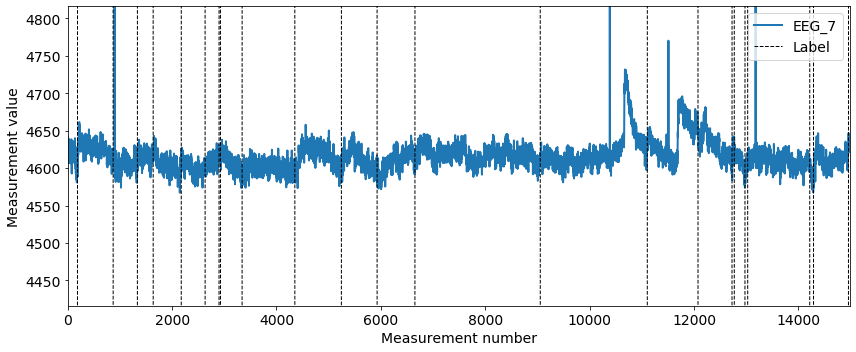

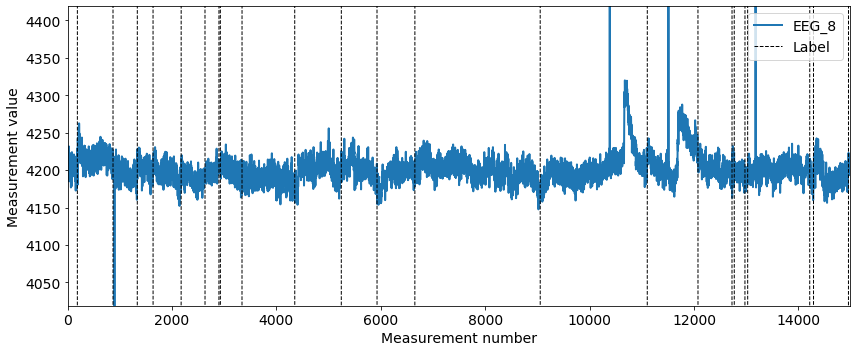

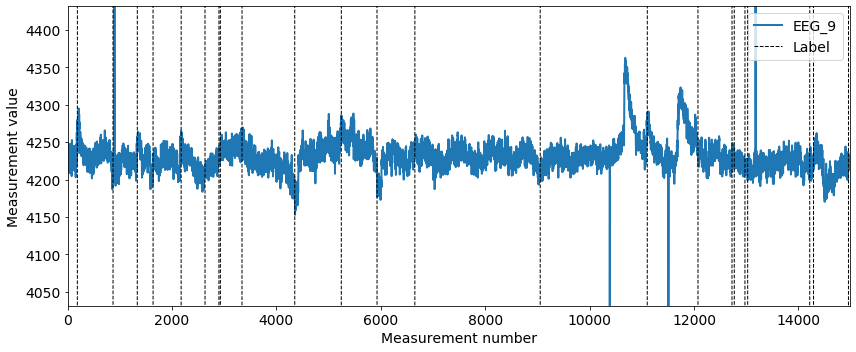

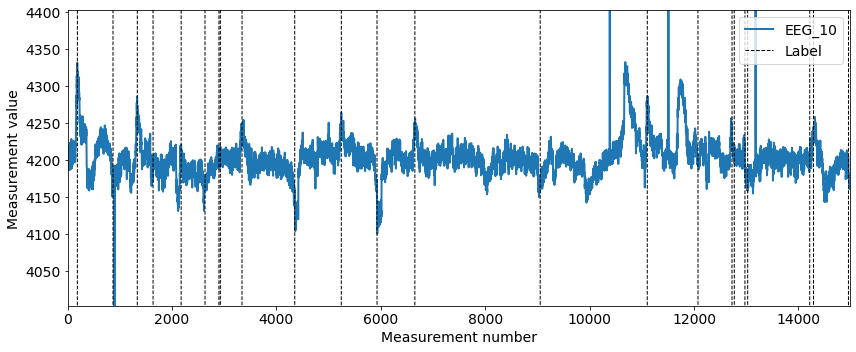

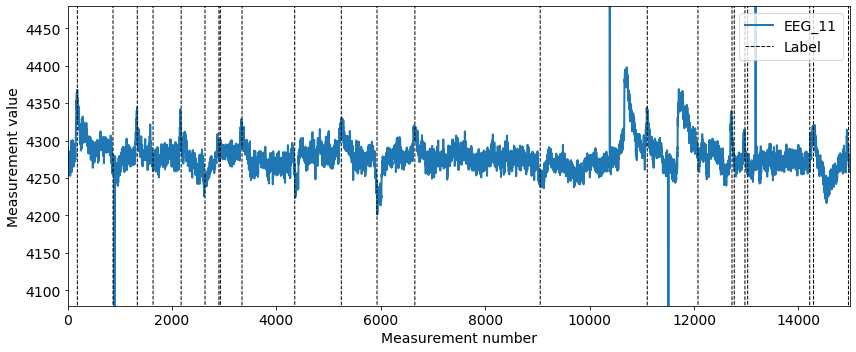

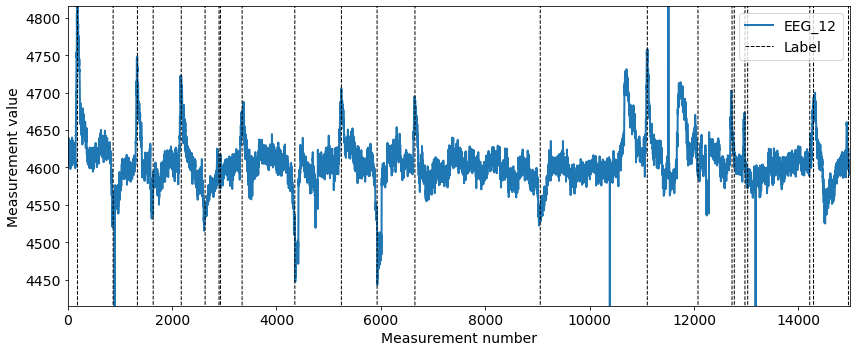

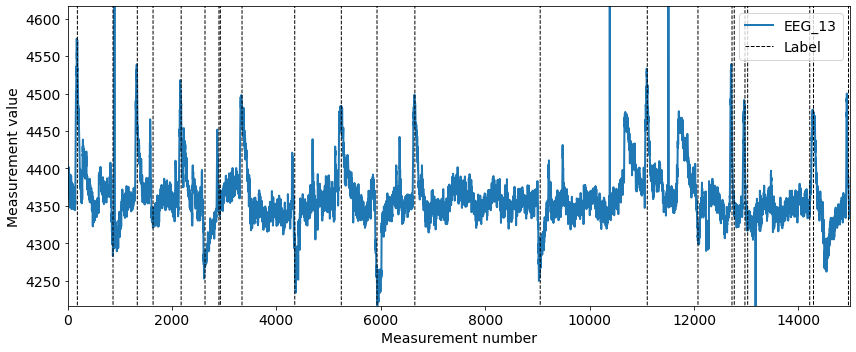

In [7]:
for i_col in range(X.shape[1]):
    
    ax = X[:, i_col]
    lab = y * 600 + ax.mean() - 300
    
    plt.figure(figsize=(12, 5))
    plt.plot(range(len(ax)), ax, label='EEG_'+str(i_col), linewidth=2)
    plt.plot(range(len(ax)), lab, label='Label', linewidth=1, color='0', linestyle='--')
    #plt.plot([0, len(ax)], [0, 0], color='0', linestyle='--', linewidth=2)
    
    plt.xlim(0, len(ax))
    plt.xticks(size=14)
    plt.xlabel('Measurement number', size=14)
    
    plt.ylim(ax.mean()-200, ax.mean()+200)
    plt.yticks(size=14)
    plt.ylabel('Measurement value', size=14)
    
    #plt.title("Dataset "+aname, size=14, loc='left')
    plt.legend(loc='upper right', fontsize=14)
    
    plt.tight_layout()
    #plt.savefig(fname="pics/egg_full_"+aname+".pdf", format="pdf")
    plt.show()

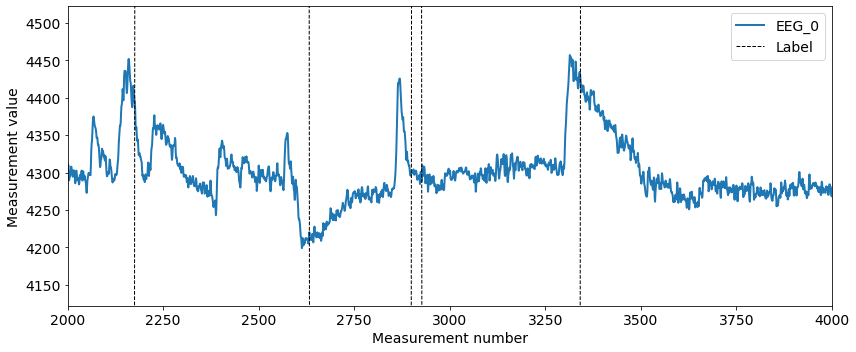

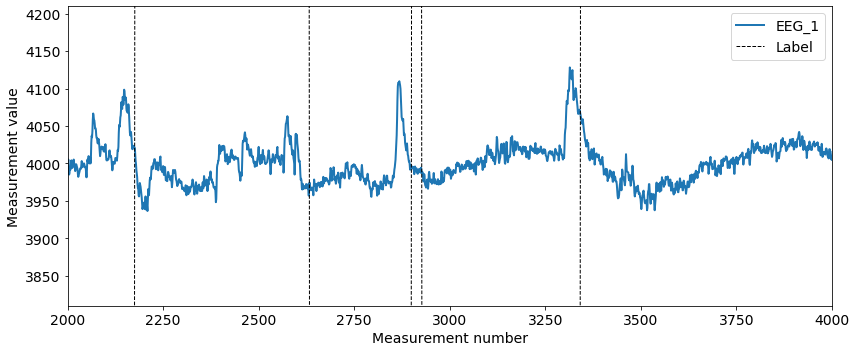

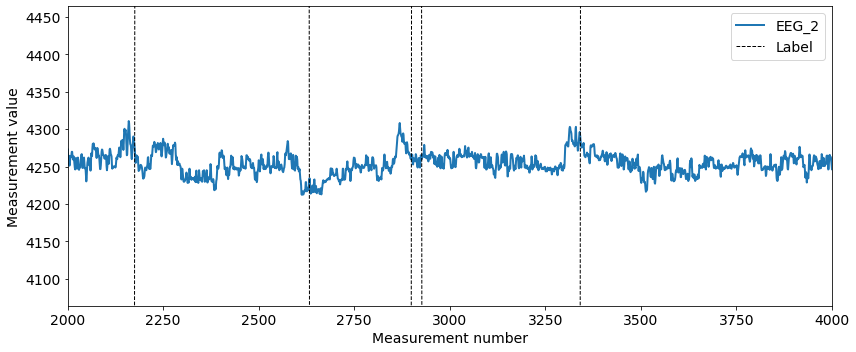

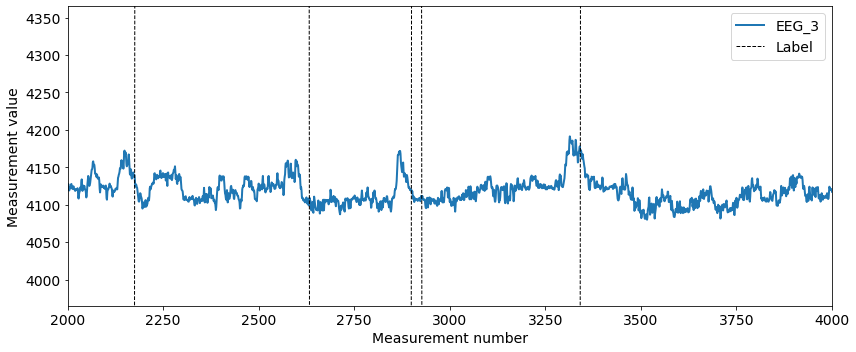

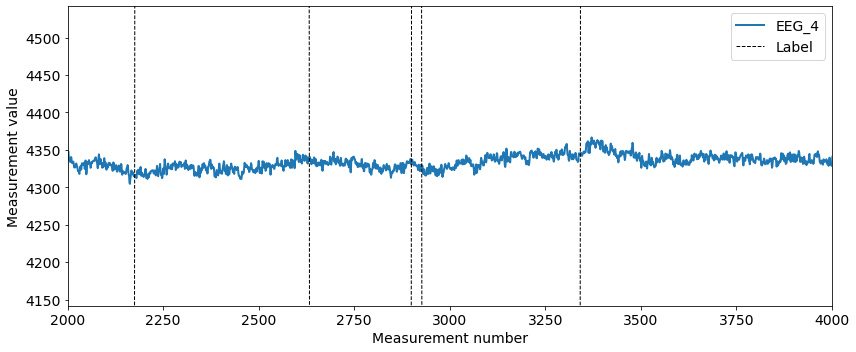

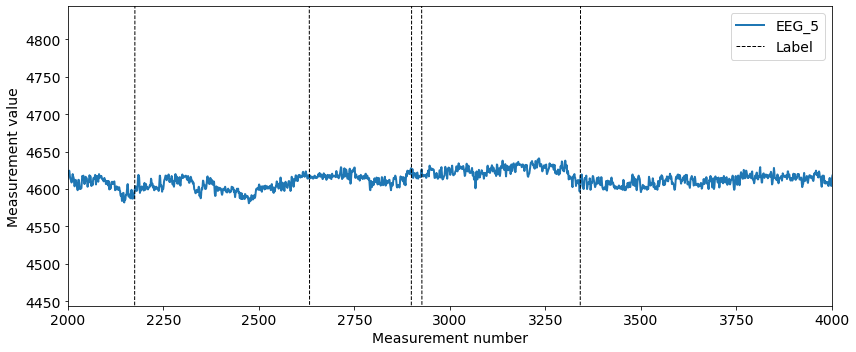

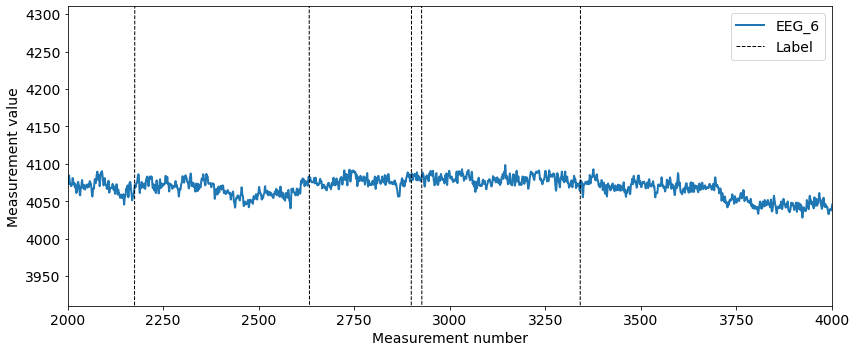

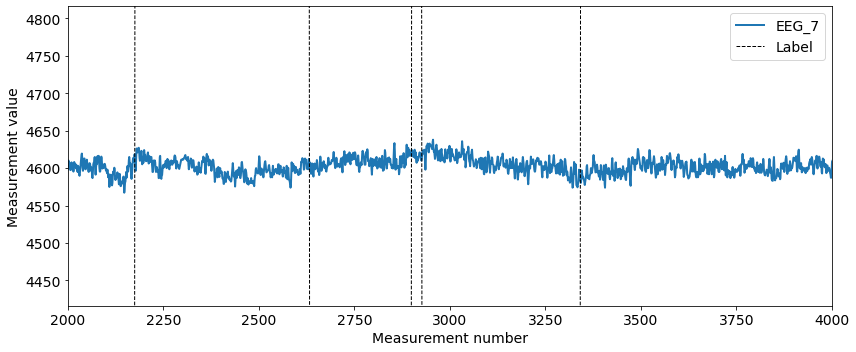

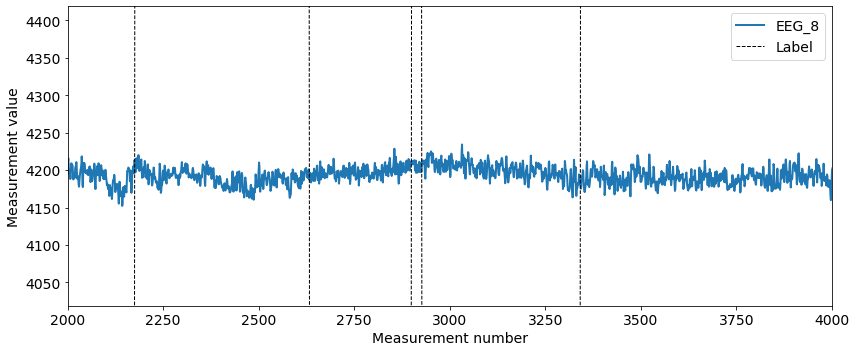

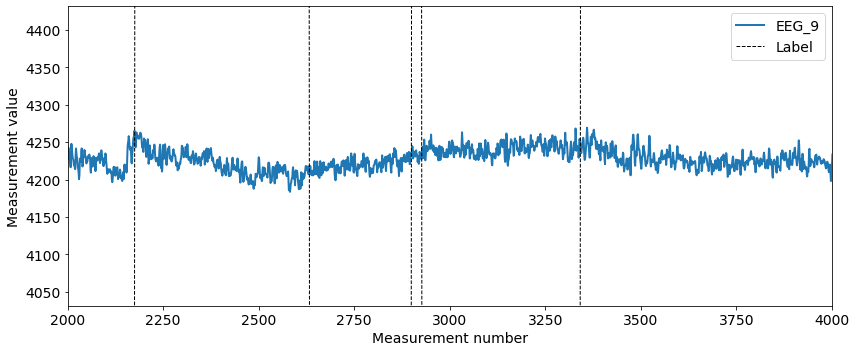

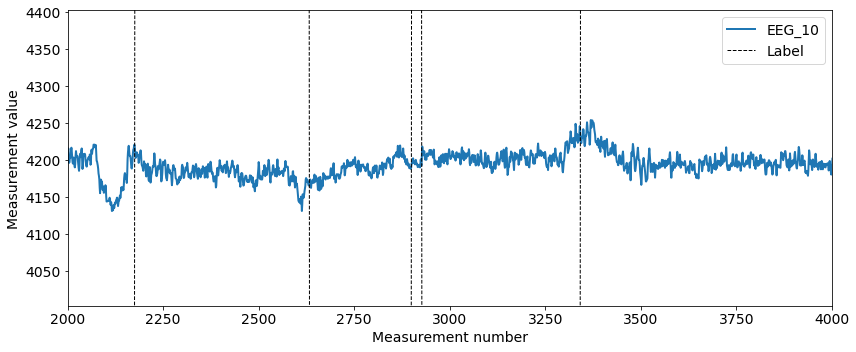

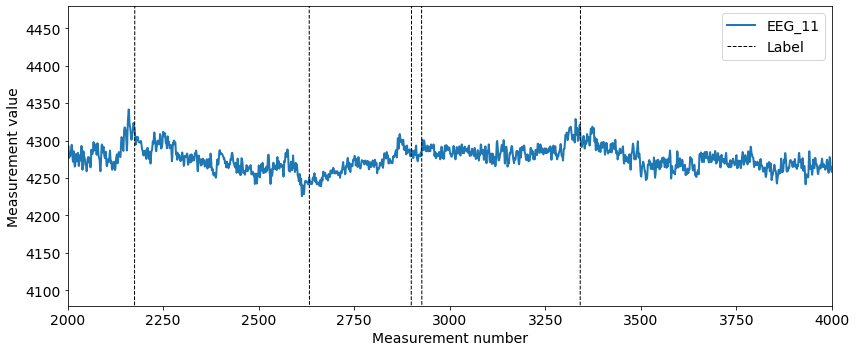

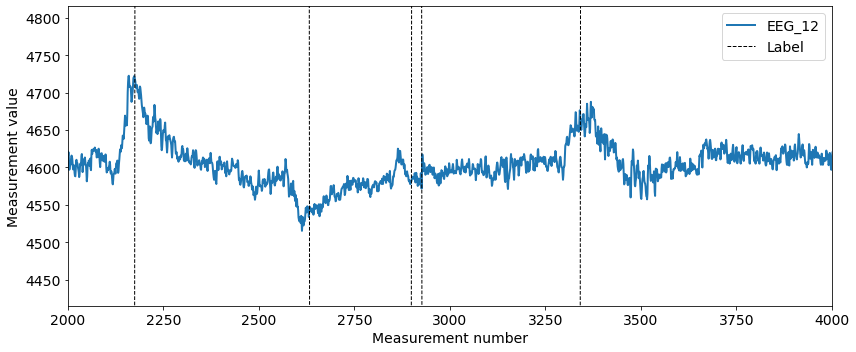

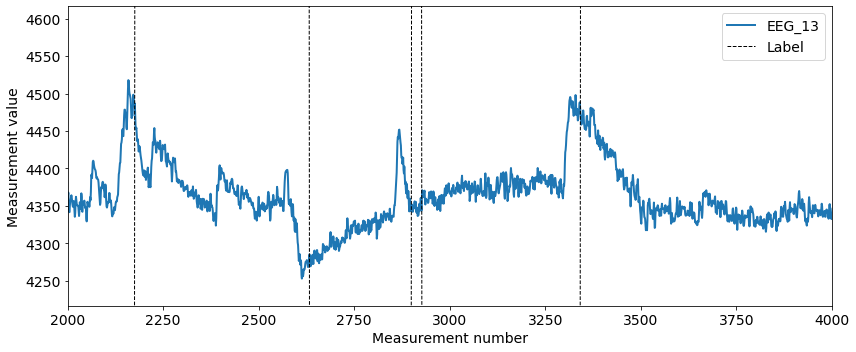

In [8]:
for i_col in range(X.shape[1]):
    
    ax = X[:, i_col]
    lab = y * 600 + ax.mean() - 300
    
    plt.figure(figsize=(12, 5))
    plt.plot(range(len(ax)), ax, label='EEG_'+str(i_col), linewidth=2)
    plt.plot(range(len(ax)), lab, label='Label', linewidth=1, color='0', linestyle='--')
    #plt.plot([0, len(ax)], [0, 0], color='0', linestyle='--', linewidth=2)
    
    plt.xlim(2000, 4000)
    plt.xticks(size=14)
    plt.xlabel('Measurement number', size=14)
    
    plt.ylim(ax.mean()-200, ax.mean()+200)
    plt.yticks(size=14)
    plt.ylabel('Measurement value', size=14)
    
    #plt.title("Dataset "+aname, size=14, loc='left')
    plt.legend(loc='upper right', fontsize=14)
    
    plt.tight_layout()
    #plt.savefig(fname="pics/egg_full_"+aname+".pdf", format="pdf")
    plt.show()